# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Incidents

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)
data_loader.execute(clean=True, processed=True, enhanced=True)

Loading dataset: 100%|██████████| 6/6 [00:14<00:00,  2.50s/it]


In [5]:
df = data_loader.enhanced_incidents_df

# Types of Resources

In [6]:
unique_tiltak_types = df['resource_type'].unique()
print(unique_tiltak_types)

['Ambulanse']


# SSB Data

In [7]:
# gathered from SSB
population_data = {
    "Date": ["2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01"],
    "Akershus Population": [584899, 594533, 604368, 614026, 624055],
    "Oslo Population": [647676, 658390, 666759, 673469, 681067]
}

pop_df = pd.DataFrame(population_data)
pop_df['Date'] = pd.to_datetime(pop_df['Date'])
pop_df.set_index('Date', inplace=True)

In [8]:
# gathered from SSB
ambulance_data = {
    "Year": [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Total Ambulance Missions": [131825, 139777, 142785, 140363, 146300, 154669, 158511, 168097, 176594, 172944, 183454, 180462],
    "Acute Ambulance Missions": [50918, 55536, 58419, 55636, 60412, 65878, 68413, 72253, 77486, 79010, 89499, 95909],
    "Urgent Ambulance Missions": [40152, 44773, 46928, 50190, 50819, 53975, 54419, 58921, 63685, 60416, 59917, 52507],
    "Non-Urgent Ambulance Missions": [40755, 39468, 37438, 34537, 35069, 34816, 35679, 36923, 35423, 33518, 34038, 32046]
}

population_data = {
    "Year": [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Population": [599230, 613285, 623966, 634463, 647676, 658390, 666759, 673469, 681067, 693494, 697010, 699827]
}

df_ambulance = pd.DataFrame(ambulance_data).set_index("Year")
df_population = pd.DataFrame(population_data).set_index("Year")

# Ambulance Missions in Relation to Population

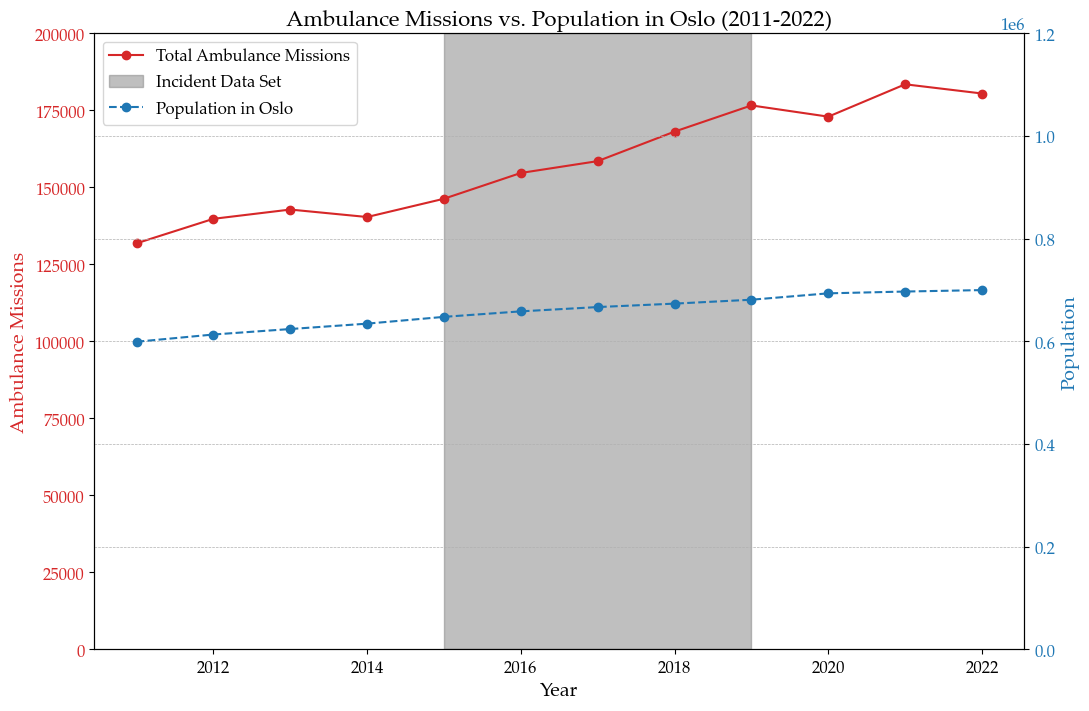

In [9]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

y_lim_top = 200000

# Ambulance data on the primary y-axis
color1 = 'tab:red'
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Ambulance Missions', color=color1, fontsize=14)
ax1.set_ylim(bottom=0, top=y_lim_top)
ax1.plot(df_ambulance.index, df_ambulance['Total Ambulance Missions'], label='Total Ambulance Missions', color=color1, marker='o')
ax1.tick_params(axis='y', labelcolor=color1)

# Gray out a section from 2015 to 2019
plt.axvspan(2015, 2019, color='grey', alpha=0.5, label='Incident Data Set')

# Population data on the secondary y-axis
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Population', color=color2, fontsize=14)
ax2.set_ylim(bottom=0, top=y_lim_top*6)
ax2.plot(df_population.index, df_population['Population'], label='Population in Oslo', color=color2, linestyle='--', marker='o')
ax2.tick_params(axis='y', labelcolor=color2)

# Handling legends for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Create a patch for the legend entry for the grayed out section
incident_patch = mpatches.Patch(color='grey', alpha=0.5, label='Incident Data Set')

plt.legend(handles=handles1+handles2, loc='upper left')

plt.title('Ambulance Missions vs. Population in Oslo (2011-2022)', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Make sure to replace './plots/ambulance_mission_vs_population.png' with your actual path
plt.savefig('./plots/ambulance_mission_vs_population.png', dpi=300, bbox_inches='tight')

plt.show()


# Triage Categories in relation to Population (total)

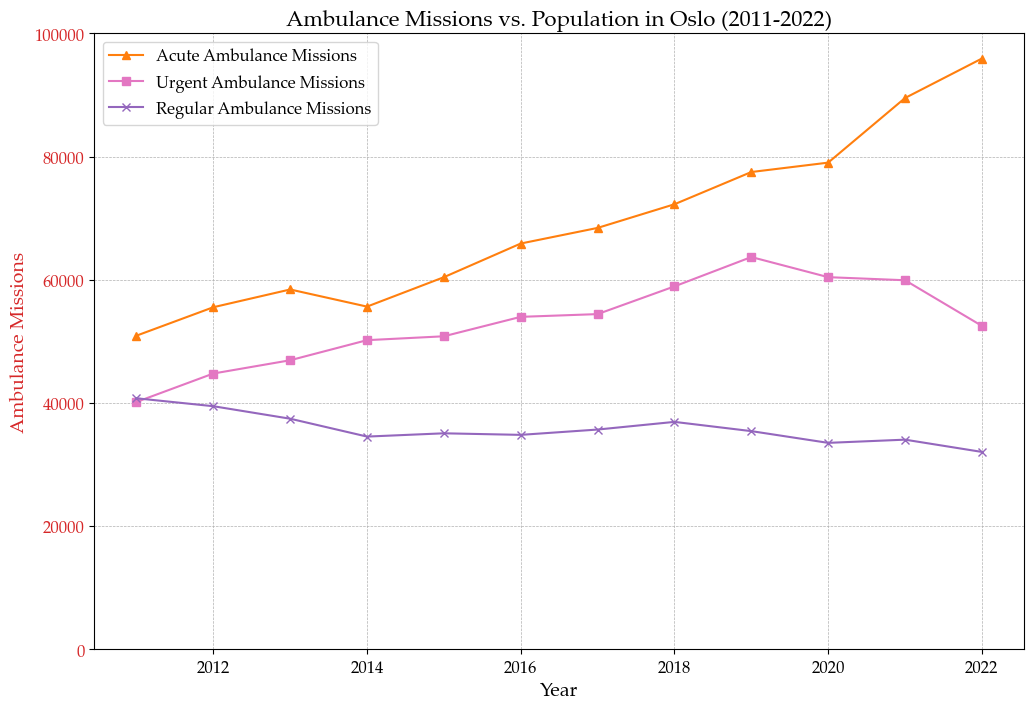

In [10]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Ambulance data on the primary y-axis
color1 = 'tab:red'
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Ambulance Missions', color=color1, fontsize=14)
ax1.set_ylim(bottom=0, top = 100000)
ax1.plot(df_ambulance.index, df_ambulance['Acute Ambulance Missions'], label='Acute Ambulance Missions', color='tab:orange', marker='^')
ax1.plot(df_ambulance.index, df_ambulance['Urgent Ambulance Missions'], label='Urgent Ambulance Missions', color='tab:pink', marker='s')
ax1.plot(df_ambulance.index, df_ambulance['Non-Urgent Ambulance Missions'], label='Regular Ambulance Missions', color='tab:purple', marker='x')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.legend(loc='upper left')

plt.title('Ambulance Missions vs. Population in Oslo (2011-2022)', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



# Triage Categories in relation to Population (percentage)

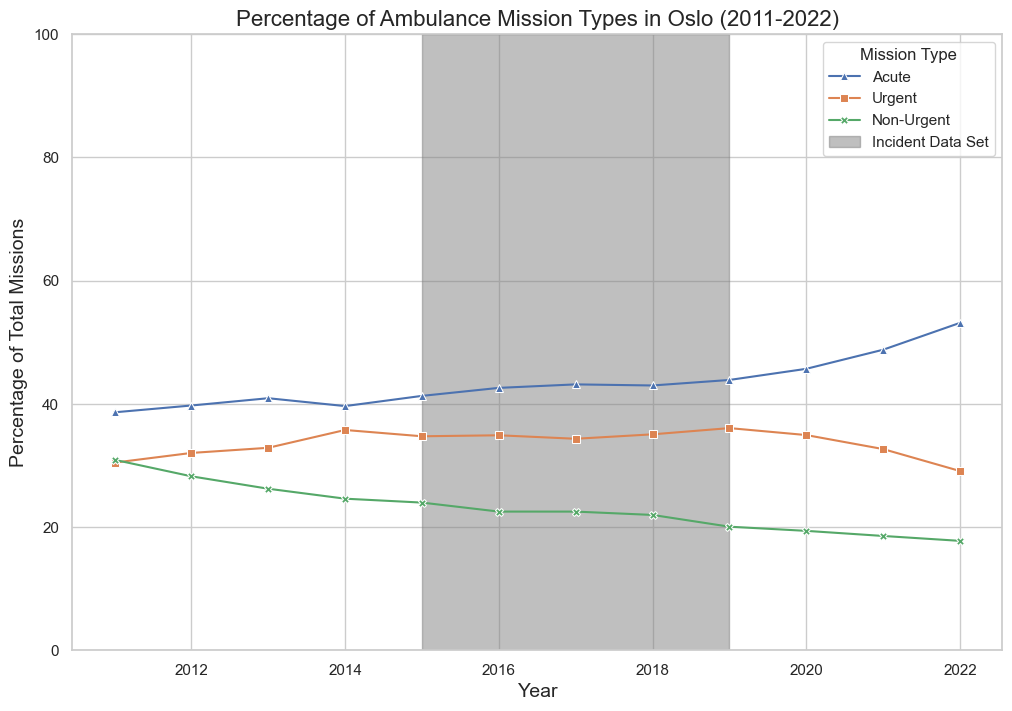

In [11]:
# Calculate the percentages first
total_missions = df_ambulance['Acute Ambulance Missions'] + df_ambulance['Urgent Ambulance Missions'] + df_ambulance['Non-Urgent Ambulance Missions']
df_ambulance['Acute Percent'] = (df_ambulance['Acute Ambulance Missions'] / total_missions) * 100
df_ambulance['Urgent Percent'] = (df_ambulance['Urgent Ambulance Missions'] / total_missions) * 100
df_ambulance['Non-Urgent Percent'] = (df_ambulance['Non-Urgent Ambulance Missions'] / total_missions) * 100

# Reshape the DataFrame
df_melted = pd.melt(df_ambulance.reset_index(), id_vars='Year', value_vars=['Acute Percent', 'Urgent Percent', 'Non-Urgent Percent'],
                    var_name='Mission Type', value_name='Percentage')

# Replace the column values to match the desired legend
df_melted['Mission Type'] = df_melted['Mission Type'].replace({'Acute Percent': 'Acute', 'Urgent Percent': 'Urgent', 'Non-Urgent Percent': 'Non-Urgent'})

# Define colors and markers.
palette = {'Acute': 'orange', 'Urgent': 'blue', 'Non-Urgent': 'green'}
markers = {'Acute': '^', 'Urgent': 's', 'Non-Urgent': 'X'}

# Plot each category individually.
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
for mission_type, color in palette.items():
    # Filter the data for the current mission type.
    df_filtered = df_melted[df_melted['Mission Type'] == mission_type]
    # Plot the filtered data.
    sns.lineplot(data=df_filtered, x='Year', y='Percentage', marker=markers[mission_type], label=mission_type)

# Gray out a section from 2015 to 2019
plt.gca().axvspan(2015, 2019, color='grey', alpha=0.5, label='Incident Data Set')

plt.title('Percentage of Ambulance Mission Types in Oslo (2011-2022)', fontsize=16)
plt.ylabel('Percentage of Total Missions', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylim(0, 100)

# Adjust the legend to include the 'Oslo Incident Set'
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Mission Type')

plt.savefig('./plots/ambulance_mission_types_percentage.png', dpi=300, bbox_inches='tight')

plt.show()


# Response Time by Month and by Day of Week

In [12]:
# Adding necessary time columns
df['month'] = df['time_call_received'].dt.month_name()
df['day_of_week'] = df['time_call_received'].dt.day_name()
df['hour'] = df['time_call_received'].dt.hour

df['response_time'] = (df['time_ambulance_arrived_at_scene'] - df['time_call_received']) / pd.Timedelta(minutes=1)

C:\Users\torju\AppData\Local\Temp\ipykernel_19728\52199248.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='response_time', hue='triage_impression_during_call', data=df, marker='o', estimator='mean', ci=None)


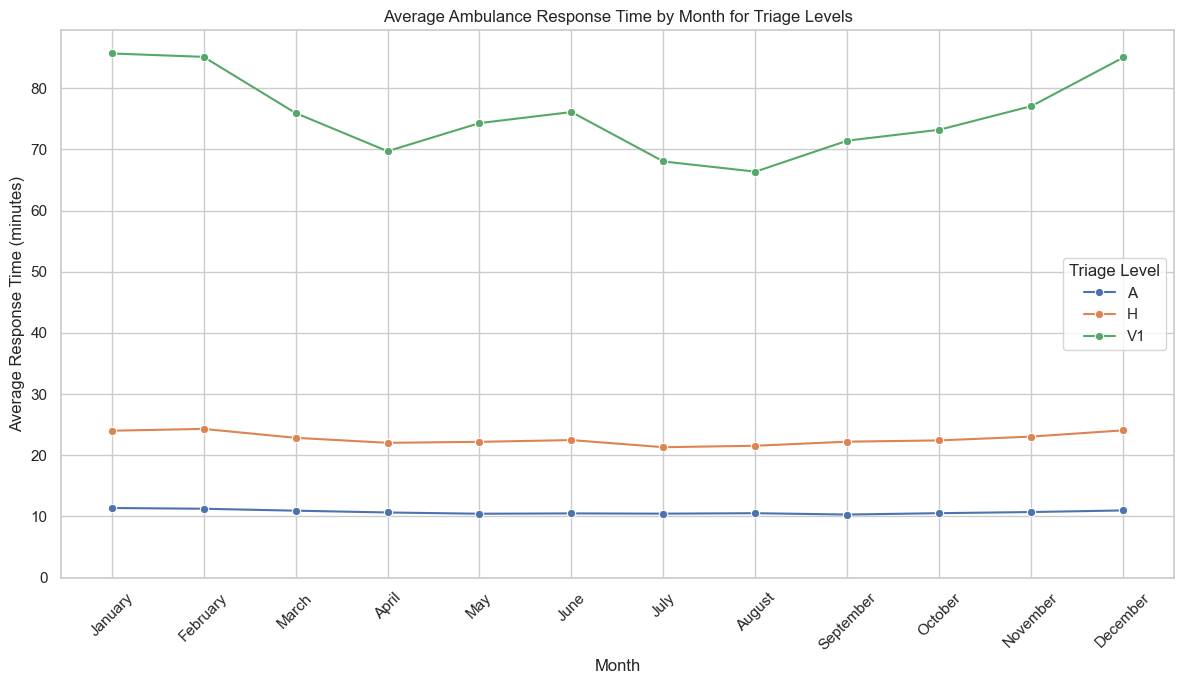

C:\Users\torju\AppData\Local\Temp\ipykernel_19728\52199248.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='day_of_week', y='response_time', hue='triage_impression_during_call', data=df, marker='o', estimator='mean', ci=None, sort=False)


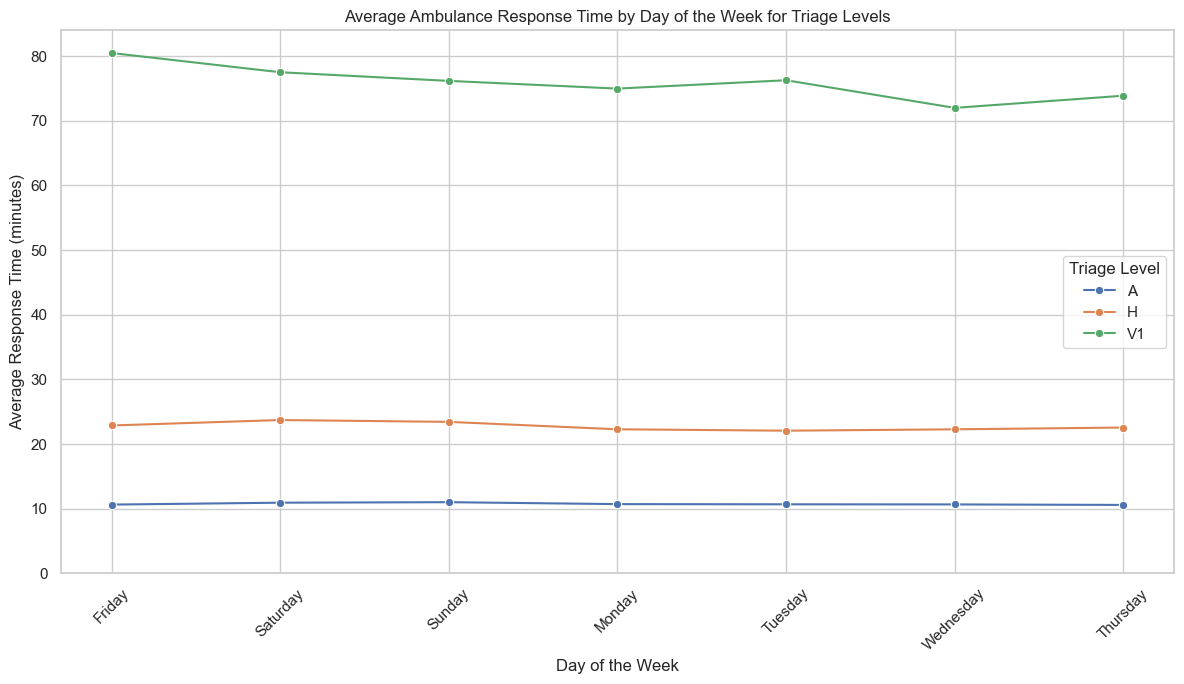

In [13]:
# Response Time by Month for different triage levels
plt.figure(figsize=(12, 7))
sns.lineplot(x='month', y='response_time', hue='triage_impression_during_call', data=df, marker='o', estimator='mean', ci=None)
plt.title('Average Ambulance Response Time by Month for Triage Levels')
plt.xlabel('Month')
plt.ylabel('Average Response Time (minutes)')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Triage Level')
plt.tight_layout()
plt.show()

# Response Time by Day of the Week for different triage levels
plt.figure(figsize=(12, 7))
sns.lineplot(x='day_of_week', y='response_time', hue='triage_impression_during_call', data=df, marker='o', estimator='mean', ci=None, sort=False)
plt.title('Average Ambulance Response Time by Day of the Week for Triage Levels')
plt.xlabel('Day of the Week')
plt.ylabel('Average Response Time (minutes)')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Triage Level')
plt.tight_layout()
plt.show()


# Number of Incidents per Hour, Day and Month

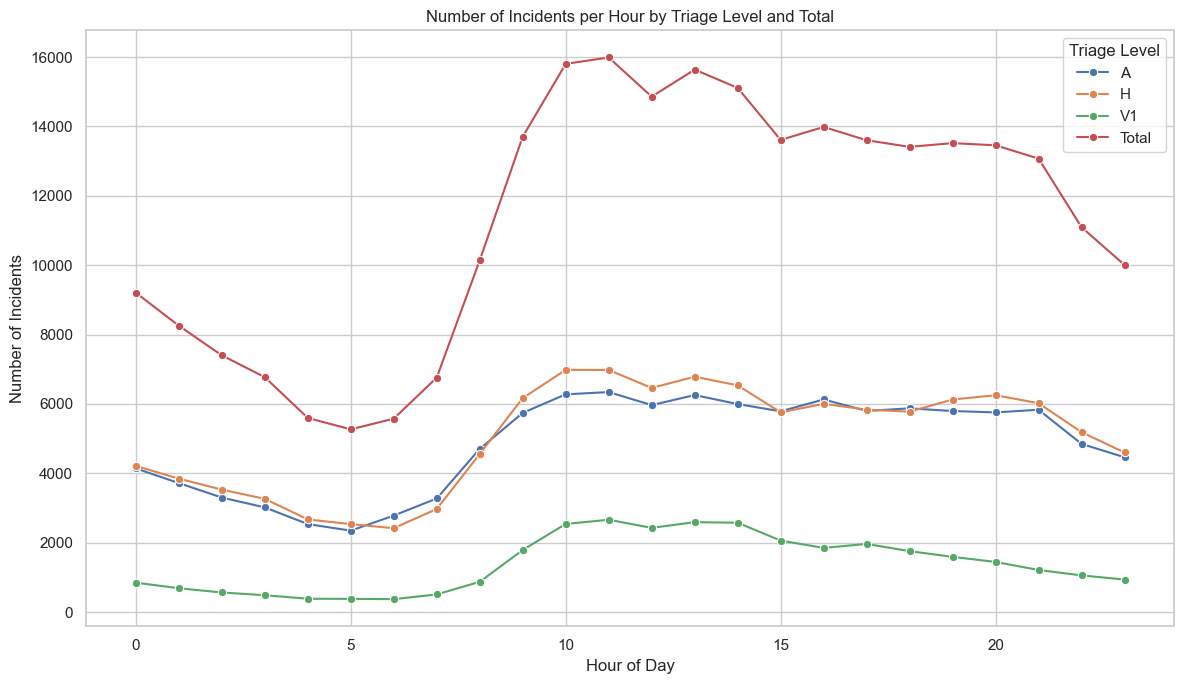

In [14]:
df = data_loader.enhanced_incidents_df

# Adding necessary time columns
df['month'] = df['time_call_received'].dt.month_name()
df['day_of_week'] = df['time_call_received'].dt.day_name()
df['hour'] = df['time_call_received'].dt.hour

df['response_time'] = (df['time_ambulance_arrived_at_scene'] - df['time_call_received']) / pd.Timedelta(minutes=1)

# Group by required categories and count incidents
df_grouped_day = df.groupby(['day_of_week', 'triage_impression_during_call']).size().unstack().fillna(0)
df_grouped_hour = df.groupby(['hour', 'triage_impression_during_call']).size().unstack().fillna(0)
df_grouped_month = df.groupby(['month', 'triage_impression_during_call']).size().unstack().fillna(0)

# Adding total counts per group
df_grouped_day['Total'] = df_grouped_day.sum(axis=1)
df_grouped_hour['Total'] = df_grouped_hour.sum(axis=1)
df_grouped_month['Total'] = df_grouped_month.sum(axis=1)

# Melt for plotting
df_melted_day = df_grouped_day.reset_index().melt(id_vars='day_of_week', var_name='Triage Level', value_name='Number of Incidents')
df_melted_hour = df_grouped_hour.reset_index().melt(id_vars='hour', var_name='Triage Level', value_name='Number of Incidents')
df_melted_month = df_grouped_month.reset_index().melt(id_vars='month', var_name='Triage Level', value_name='Number of Incidents')

# Plotting Incidents by Hour with Triage Levels and Total
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_melted_hour, x='hour', y='Number of Incidents', hue='Triage Level', marker='o')
plt.title('Number of Incidents per Hour by Triage Level and Total')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()


# Processed and Enhanced Incident Stats

In [15]:
df_processed = data_loader.processed_incidents_df
df_processed['response_time'] = (df_processed['time_ambulance_arrived_at_scene'] - df_processed['time_call_received']) / pd.Timedelta(minutes=1)


df_enhanced = data_loader.enhanced_incidents_df
df_enhanced['response_time'] = (df_enhanced['time_ambulance_arrived_at_scene'] - df_enhanced['time_call_received']) / pd.Timedelta(minutes=1)

dfs = [df_processed, df_enhanced]

for df in dfs:
    grouped_stats = df.groupby('triage_impression_during_call')['response_time'].agg(
        mean_response_time='mean',
        median_response_time='median',
        perc_90_response_time=lambda x: x.quantile(0.9),
        std_dev_response_time='std',
        min_response_time='min',
        max_response_time='max',
        skewness_response_time='skew'
    )

    mean_response_time = df['response_time'].mean()
    std_dev_response_time = df['response_time'].std()
    z_score = 3

    # Calculate the value corresponding to a z-score of 3
    value_at_z_3 = mean_response_time + z_score * std_dev_response_time

    value_at_z_3

    grouped_stats['value_at_z_3'] = value_at_z_3

    # Display the statistics
    print(grouped_stats)



                               mean_response_time  median_response_time  \
triage_impression_during_call                                             
A                                       13.412813             10.600000   
H                                       25.544372             19.966667   
V                                      130.656289            108.983333   
V1                                      69.905987             47.366667   
V2                                     525.794839             61.000000   

                               perc_90_response_time  std_dev_response_time  \
triage_impression_during_call                                                 
A                                          22.450000              17.245508   
H                                          45.683333              25.302405   
V                                         302.250000             107.772469   
V1                                        155.045000              74.028471   


In [16]:
for df in dfs:
    categories = ['A', 'H', 'V1']
    actual_mean_std = {}

    for cat in categories:
        category_df = df[df['triage_impression_during_call'] == cat]
        mean_response_time = category_df['response_time'].mean()
        std_dev_response_time = category_df['response_time'].std()
        actual_mean_std[cat] = {'mean': mean_response_time, 'std': std_dev_response_time}

    actual_cut_off_values = {category: details['mean'] + 3 * details['std'] for category, details in actual_mean_std.items()}

    print(actual_cut_off_values)


{'A': 65.14933659250875, 'H': 101.451587675218, 'V1': 291.99140070976966}
{'A': 26.411861075656045, 'H': 68.822678667601, 'V1': 431.7155609688624}


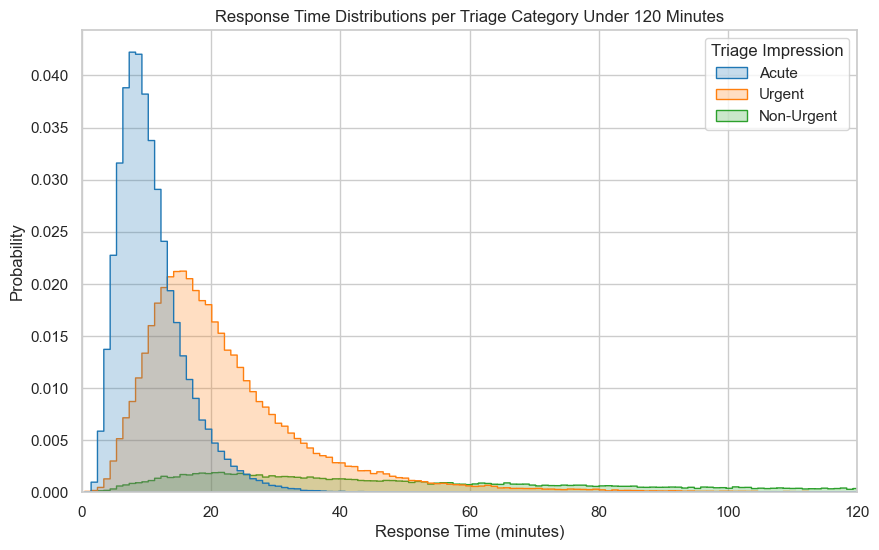

In [17]:
category_mapping = {
    'A': 'Acute',
    'H': 'Urgent',
    'V1': 'Non-Urgent'
}

df['Triage Impression'] = df['triage_impression_during_call'].map(category_mapping)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(data=df, x='response_time', hue='Triage Impression', element="step", stat="probability", common_norm=True, palette="tab10", bins=3000)

plt.title('Response Time Distributions per Triage Category Under 120 Minutes')
plt.xlabel('Response Time (minutes)')
plt.ylabel('Probability')

plt.xlim(left=0, right=120)

plt.savefig('./plots/response_time_histogram.png', dpi=300, bbox_inches='tight')

plt.show()



# Box Plot of Time Steps

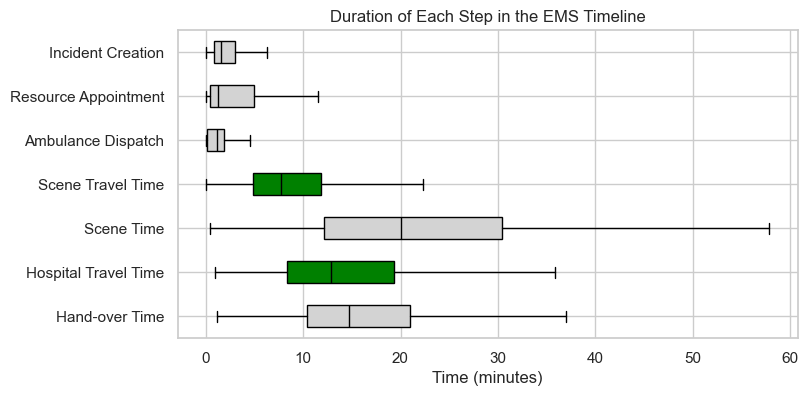

In [18]:
title = "Duration of Each Step in the EMS Timeline"

temp_df = df_enhanced.copy()

steps = {
    "Incident Creation": ("time_call_received", "time_incident_created"),
    "Resource Appointment": ("time_incident_created", "time_resource_appointed"),
    "Ambulance Dispatch": ("time_resource_appointed", "time_ambulance_dispatch_to_scene"),
    "Scene Travel Time": ("time_ambulance_dispatch_to_scene", "time_ambulance_arrived_at_scene"),
    "Scene Time": ("time_ambulance_arrived_at_scene", "time_ambulance_dispatch_to_hospital", "time_ambulance_available"),
    "Hospital Travel Time": ("time_ambulance_dispatch_to_hospital", "time_ambulance_arrived_at_hospital"),
    "Hand-over Time": ("time_ambulance_arrived_at_hospital", "time_ambulance_available")
}

for step, times in steps.items():
    if len(times) == 3:
        temp_df.loc[temp_df[times[1]].isna(), step] = (temp_df[times[2]] - temp_df[times[0]]).dt.total_seconds() / 60
        temp_df.loc[~temp_df[times[1]].isna(), step] = (temp_df[times[1]] - temp_df[times[0]]).dt.total_seconds() / 60
    else:
        temp_df[step] = (temp_df[times[1]] - temp_df[times[0]]).dt.total_seconds() / 60

plot_data = [temp_df[step].dropna() for step in steps if step not in ["Dispatching to Hospital", "At Hospital"]]
labels = [key for key in steps.keys() if key not in ["Dispatching to Hospital", "At Hospital"]]

plt.figure(figsize=(8, 4))
boxprops = dict(color='black')
medianprops = dict(color='black')
patch_colors = ['lightgray'] * 1 + ['green'] + ["lightgray"] + ['green'] + 3 * ['lightgray']

bp = plt.boxplot(plot_data[::-1], labels=labels[::-1], vert=False, patch_artist=True, showfliers=False, boxprops=boxprops, medianprops=medianprops)

for patch, color in zip(bp['boxes'], patch_colors):
    patch.set_facecolor(color)

plt.title(title)
plt.xlabel("Time (minutes)")
plt.xticks()
plt.savefig('./plots/ems_timestage_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

Rows removed with Z-score filtering: 6961


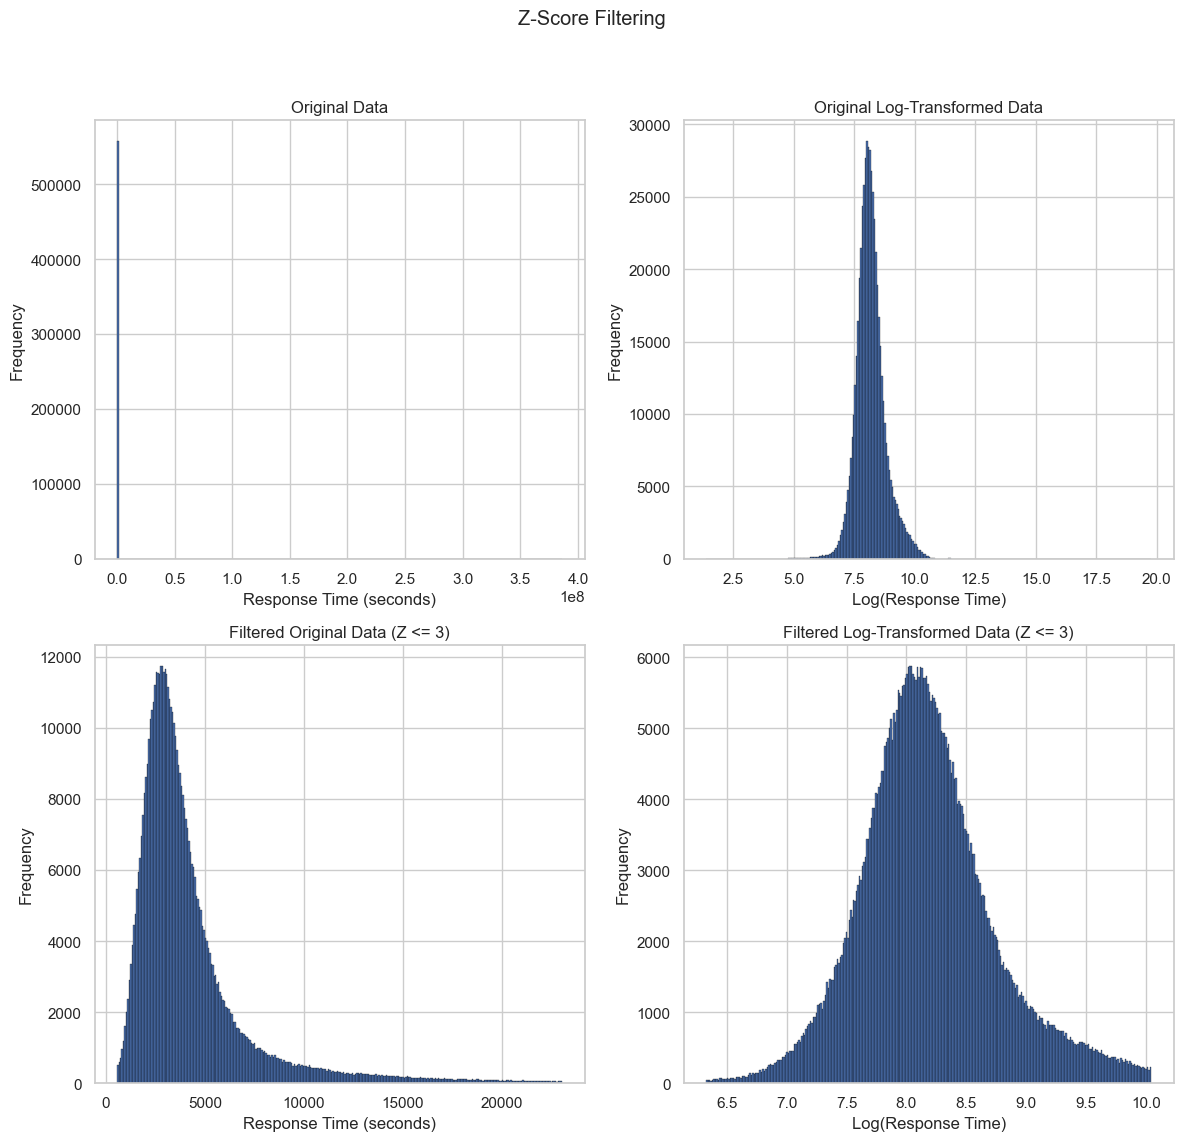

In [19]:
def process_and_plot(df, title):
    # Ensure datetime conversion
    df['time_call_received'] = pd.to_datetime(df['time_call_received'])
    df['time_ambulance_arrived_at_hospital'] = pd.to_datetime(df['time_ambulance_arrived_at_hospital'])
    
    # Calculate response time in seconds
    df['response_time_sec'] = (df['time_ambulance_arrived_at_hospital'] - df['time_call_received']).dt.total_seconds()

    # Remove invalid response times
    df = df[df['response_time_sec'] > 0].dropna(subset=['response_time_sec'])
    
    original_count = len(df)
    
    # Log transformation
    df_log = np.log1p(df['response_time_sec'])
    
    # Calculate mean and standard deviation for log-transformed data
    mean_log = np.mean(df_log)
    std_log = np.std(df_log)
    
    # Calculate Z-scores for log-transformed data
    z_scores_log = (df_log - mean_log) / std_log
    z_score_threshold = 3
    
    # Filter out outliers based on Z-score
    df_log_filtered = df_log[np.abs(z_scores_log) <= z_score_threshold]
    
    # Revert log transformation for the filtered data
    df_filtered = np.expm1(df_log_filtered)
    
    removed_rows = original_count - len(df_filtered)
    print(f"Rows removed with Z-score filtering: {removed_rows}")
    
    # Set up the plotting grid
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Adjust the size as needed
    fig.suptitle(title)
    
    # Original data
    axs[0, 0].hist(df['response_time_sec'], bins=300, edgecolor='black', linewidth=0.2)
    axs[0, 0].set_xlabel('Response Time (seconds)')
    axs[0, 0].set_ylabel('Frequency')
    axs[0, 0].set_title('Original Data')

    # Original log-transformed data
    axs[0, 1].hist(df_log, bins=300, edgecolor='black', linewidth=0.2)
    axs[0, 1].set_xlabel('Log(Response Time)')
    axs[0, 1].set_ylabel('Frequency')
    axs[0, 1].set_title('Original Log-Transformed Data')
    
    # Filtered original scale data
    axs[1, 0].hist(df_filtered, bins=300, edgecolor='black', linewidth=0.2)
    axs[1, 0].set_xlabel('Response Time (seconds)')
    axs[1, 0].set_ylabel('Frequency')
    axs[1, 0].set_title(f'Filtered Original Data (Z <= {z_score_threshold})')

    # Filtered log-transformed data
    axs[1, 1].hist(df_log_filtered, bins=300, edgecolor='black', linewidth=0.2)
    axs[1, 1].set_xlabel('Log(Response Time)')
    axs[1, 1].set_ylabel('Frequency')
    axs[1, 1].set_title(f'Filtered Log-Transformed Data (Z <= {z_score_threshold})')
    
    # Improve layout to prevent overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    
    plt.savefig('./plots/z_score_filtering.png', dpi=300, bbox_inches='tight')
    
    # Display the plots
    plt.show()
    
    return df_filtered

# Assuming df_processed is your pre-loaded DataFrame
df_processed = data_loader.processed_incidents_df
df_filtered = process_and_plot(df_processed, 'Z-Score Filtering')


# Plot Stages

C:\Users\torju\AppData\Local\Temp\ipykernel_19728\3780478959.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stages, rotation=45, ha="right")


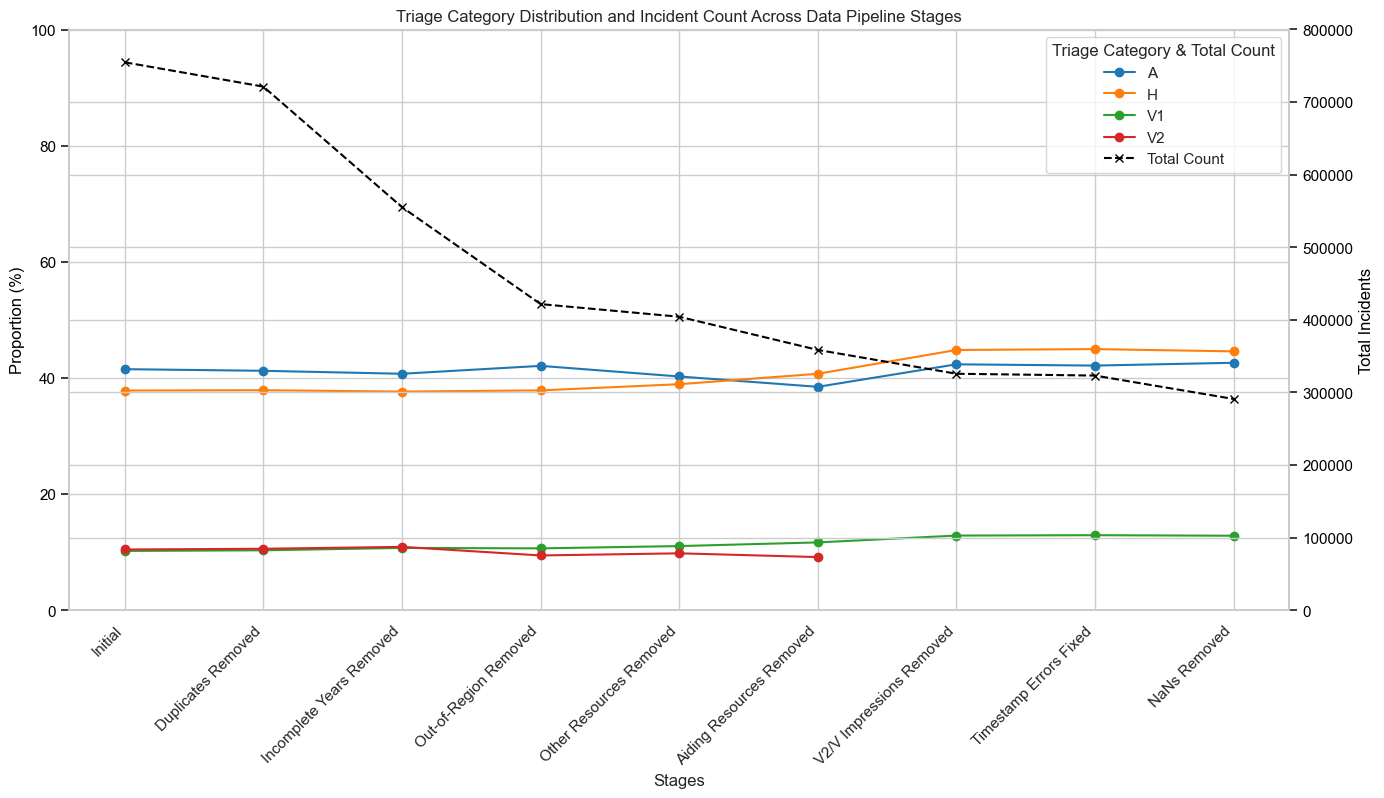

In [54]:
stages = [
    "Initial",
    "Duplicates Removed",
    "Incomplete Years Removed",
    "Out-of-Region Removed",
    "Other Resources Removed",
    "Aiding Resources Removed",
    "V2/V Impressions Removed",
    "Timestamp Errors Fixed",
    "Outliers Removed"
]

total_counts = [754811, 721278, 555240, 421678, 404268, 358527, 325726, 323221, 290964]

proportions_updated = {
    'A': [41.505587, 41.224425, 40.714585, 42.073422, 40.245881, 38.466087, 42.339740, 42.123973, 42.606302],
    'H': [37.828464, 37.877546, 37.650455, 37.850689, 38.916044, 40.711423, 44.811188, 44.960785, 44.571837],
    'V1': [10.204001, 10.312935, 10.720403, 10.646714, 11.041409, 11.673514, 12.849073, 12.915242, 12.821861],
    'V2': [10.454530, 10.577330, 10.904831, 9.425617, 9.792955, 9.145071, None, None, None],
    #'V': [0.007419, 0.007764, 0.009726, 0.003557, 0.003710, 0.003905, None, None, None]
}

# Replotting with correction for handling NaN values for V2 and V categories
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot proportions for all categories, including V2 and V, with correction for NaN handling
colors = sns.color_palette("tab10", n_colors=5)
for i, (triage, values) in enumerate(proportions_updated.items()):
    # Handling the None values for V2 and V in the later stages by converting them to np.nan
    values_with_nan = [value if value is not None else np.nan for value in values]
    ax1.plot(stages, values_with_nan, label=triage, color=colors[i], marker='o')

ax1.set_xlabel('Stages')
ax1.set_ylabel('Proportion (%)', color='black')
ax1.set_ylim(0, 100)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(stages, rotation=45, ha="right")

# Twin Axes for total count
ax2 = ax1.twinx()
ax2.plot(stages, total_counts, label='Total Count', color='black', linestyle='--', marker='x')
ax2.set_ylim(0, 800000)
ax2.set_ylabel('Total Incidents', color='black')
ax2.tick_params(axis='y', labelcolor='black')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', title='Triage Category & Total Count')

fig.tight_layout()
plt.title('Triage Category Distribution and Incident Count Across Data Pipeline Stages')

plt.savefig('./plots/pipeline_stages.png', dpi=300, bbox_inches='tight')

plt.show()